## Group Work

In [10]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [11]:
crash_file = "Airplane_Crashes_and_Fatalities_Since_1908.csv"
osmi_one = pd.read_csv(crash_file)

In [12]:
df_crash = pd.DataFrame(osmi_one)

# Adds a "Year" column
df_crash['Date'] = pd.to_datetime(df_crash['Date'])
df_crash['Day'] = df_crash['Date'].map(lambda x: x.day)
df_crash['Year'] = df_crash['Date'].map(lambda x: x.year)
df_crash['Month'] = df_crash['Date'].map(lambda x: x.month)

# df_crash['Hour'] = df_crash['Time'].map(lambda x: x.hour)
# df_crash['Minute'] = df_crash['Time'].map(lambda x: x.min)
df_crash.head(1)

,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary,Day,Year,Month
0,1908-09-17,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly...",17,1908,9


In [13]:
by_year = df_crash.groupby(["Year"]).sum()["Fatalities"]
yr_fatalities = by_year.rename(columns = {"Year": "Fatalities"})
df_yr_fatalities = pd.DataFrame(by_year)
df_yr_fatalities = df_yr_fatalities.reset_index()
df_yr_fatalities.sort_values(["Fatalities"], ascending = False).head()

,Year,Fatalities
60,1972,2937.0
73,1985,2670.0
61,1973,2485.0
84,1996,2386.0
62,1974,2318.0


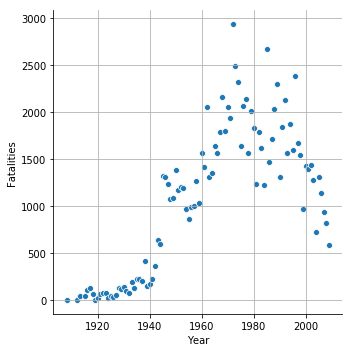

In [22]:
#All years with number of fatalities
plt_yr_fatalities = sns.relplot(x= "Year", y="Fatalities", 
                                data = df_yr_fatalities)
plt.grid()
plt.savefig("plt_yr_fatalities.png")
plt.show()

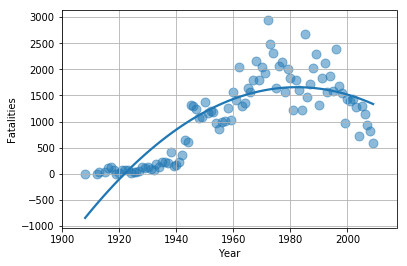

In [20]:
plt_reg_yr_fatalities = sns.regplot(x="Year", y="Fatalities", data = df_yr_fatalities,
                                    scatter_kws={"alpha" : .5, 's': 80}, 
                                    order=2, ci=None, truncate=True)
plt.grid()
plt.savefig("plt_reg_yr_fatalities.png")
plt.show()

In [16]:
by_month = df_crash.groupby(["Month"]).sum()["Fatalities"]
mth_fatalities = by_month.rename(columns = {"Month": "Fatalities"})
df_mth_fatalities = pd.DataFrame(by_month)
df_mth_fatalities = df_mth_fatalities.reset_index()
df_mth_fatalities.sort_values(["Fatalities"], ascending=False)

,Month,Fatalities
11,12,10459.0
8,9,10286.0
7,8,10174.0
10,11,10033.0
6,7,9232.0
2,3,8708.0
0,1,8425.0
9,10,8388.0
1,2,7966.0
5,6,7909.0


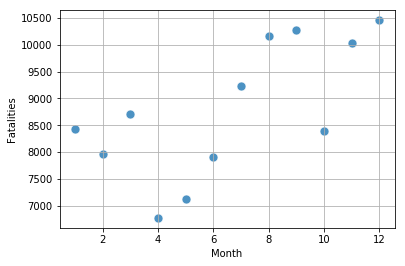

In [21]:
plt_mth_fatalities = sns.scatterplot(x="Month", y="Fatalities",
                                     alpha = .8, s = 80,
                                     data= df_mth_fatalities)
plt.grid()
plt.savefig("plt_mth_fatalities.png")
plt.show()

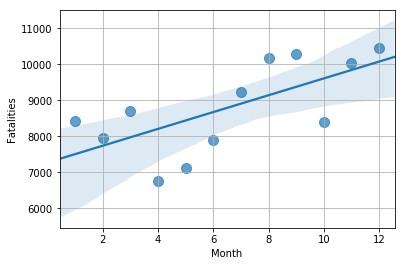

In [19]:
plt_reg_mth_fatalities = sns.regplot(x="Month", y="Fatalities",
                    scatter_kws={"alpha" : .7, 's': 100},
                    data= df_mth_fatalities)
plt.grid()
plt.savefig("plt_reg_mth_fatalities.png")
plt.show()